<AxesSubplot:xlabel='DATE'>

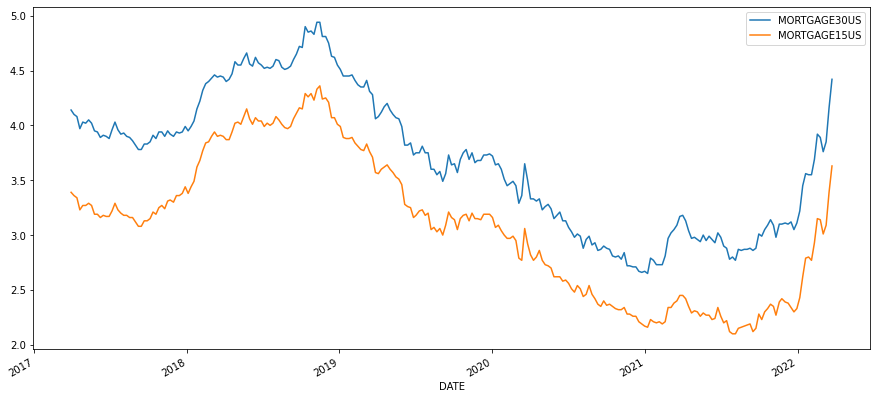

In [82]:
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta
from matplotlib.ticker import MaxNLocator

df_mortgage_rates = pdr.get_data_fred(['MORTGAGE30US','MORTGAGE15US'])

df_mortgage_rates.plot(figsize=(15,7))

In [83]:
df_dff = pdr.get_data_fred('DFF')

df.head(10)

,CSUSHPISA
DATE,
2002-04-01,119.611
2002-05-01,120.724
2002-06-01,121.813
2002-07-01,122.888
2002-08-01,123.831
2002-09-01,124.780
2002-10-01,125.734
2002-11-01,126.669
2002-12-01,127.623


No handles with labels found to put in legend.


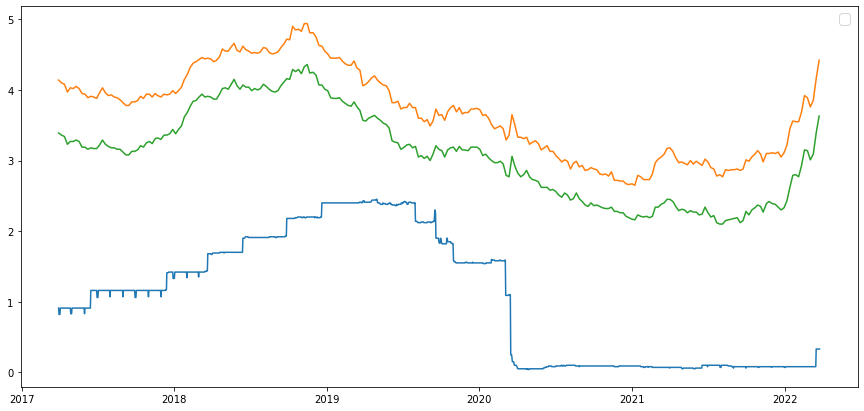

In [84]:
fig, ax = plt.subplots(figsize=(15,7))

plt.plot(df_dff)
plt.plot(df_mortgage_rates)
legend = ax.legend(loc='upper right', fontsize='x-large')


In [85]:
df_combined = df_mortgage_rates
df_combined['DFF'] = df_dff

df_combined



,MORTGAGE30US,MORTGAGE15US,DFF
DATE,,,
2017-03-30,4.14,3.39,0.91
2017-04-06,4.10,3.36,0.91
2017-04-13,4.08,3.34,0.91
2017-04-20,3.97,3.23,0.91
2017-04-27,4.03,3.27,0.91
...,...,...,...
2022-02-24,3.89,3.14,0.08
2022-03-03,3.76,3.01,0.08
2022-03-10,3.85,3.09,0.08


Text(0.5, 1.0, 'Mortgage Rates vs Fed Funds Effective Rate')

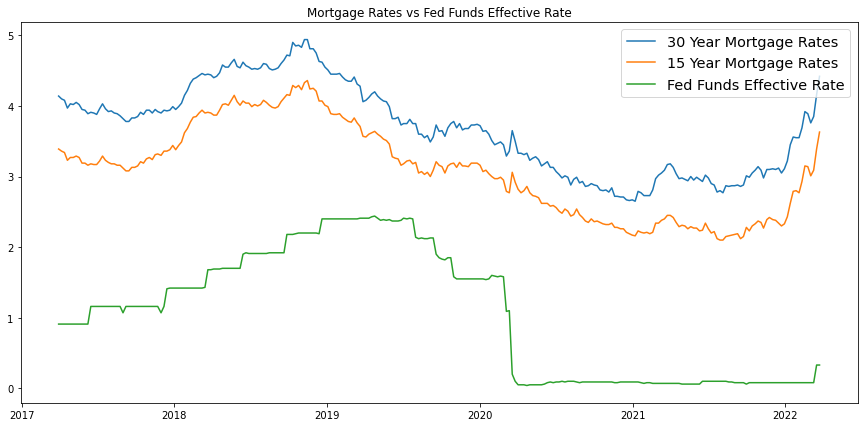

In [86]:
fig, ax = plt.subplots(figsize=(15,7))

plt.plot(df_combined['MORTGAGE30US'], label='30 Year Mortgage Rates')
plt.plot(df_combined['MORTGAGE15US'], label='15 Year Mortgage Rates')
plt.plot(df_combined['DFF'], label='Fed Funds Effective Rate')

legend = ax.legend(loc='upper right', fontsize='x-large')
plt.title('Mortgage Rates vs Fed Funds Effective Rate')

In [87]:
df_norm = (df_combined-df_combined.min())/(df_combined.max()-df_combined.min())

In [88]:
df_norm

,MORTGAGE30US,MORTGAGE15US,DFF
DATE,,,
2017-03-30,0.650655,0.570796,0.362500
2017-04-06,0.633188,0.557522,0.362500
2017-04-13,0.624454,0.548673,0.362500
2017-04-20,0.576419,0.500000,0.362500
2017-04-27,0.602620,0.517699,0.362500
...,...,...,...
2022-02-24,0.541485,0.460177,0.016667
2022-03-03,0.484716,0.402655,0.016667
2022-03-10,0.524017,0.438053,0.016667


Text(0.5, 1.0, 'Normalized Mortgage Rates vs Fed Funds Effective Rate')

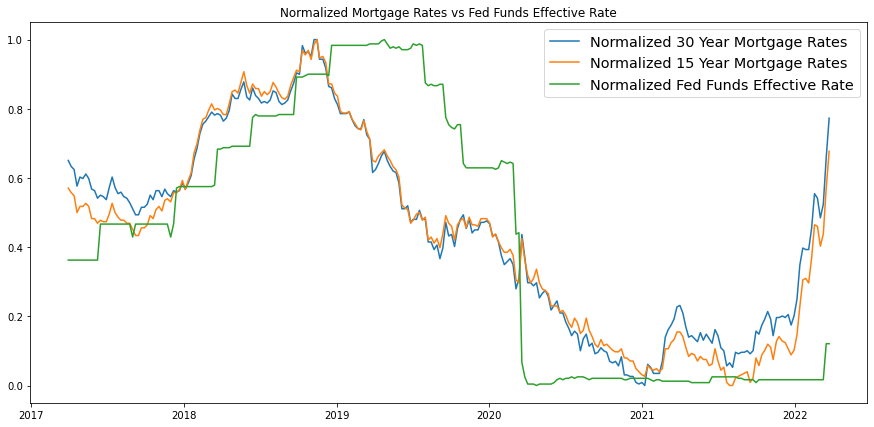

In [89]:
fig, ax = plt.subplots(figsize=(15,7))

plt.plot(df_norm['MORTGAGE30US'], label='Normalized 30 Year Mortgage Rates')
plt.plot(df_norm['MORTGAGE15US'], label='Normalized 15 Year Mortgage Rates')
plt.plot(df_norm['DFF'], label='Normalized Fed Funds Effective Rate')

legend = ax.legend(loc='upper right', fontsize='x-large')
plt.title('Normalized Mortgage Rates vs Fed Funds Effective Rate')

<AxesSubplot:xlabel='DATE'>

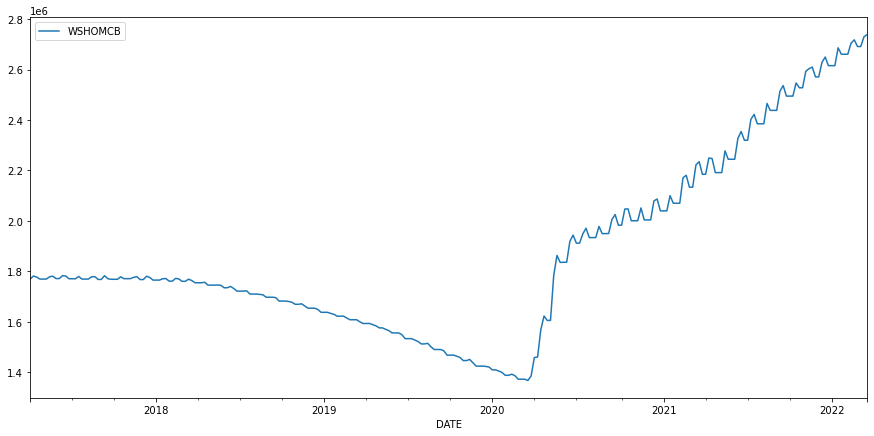

In [90]:
df_mortgage_rates = pdr.get_data_fred(['MORTGAGE30US','MORTGAGE15US'])
df_mortgage_rate_securities = pdr.get_data_fred(['WSHOMCB'])

df_mortgage_rate_securities.plot(figsize=(15,7))

<AxesSubplot:xlabel='DATE'>

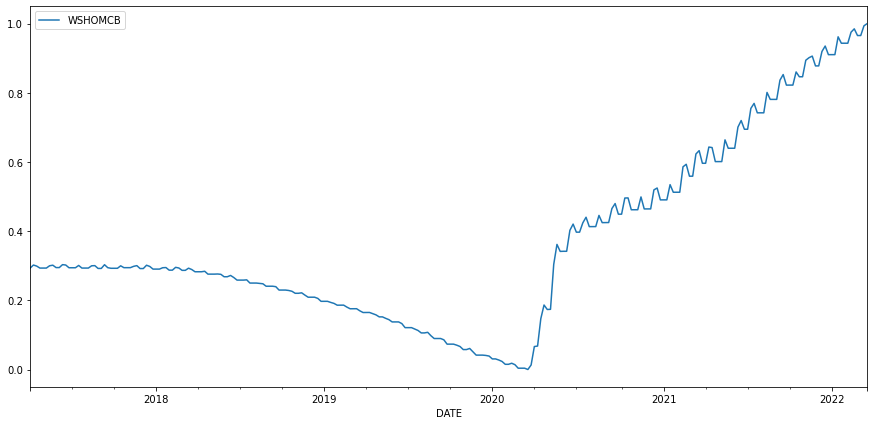

In [91]:
df_mrs_norm = (df_mortgage_rate_securities-df_mortgage_rate_securities.min())/(df_mortgage_rate_securities.max()-df_mortgage_rate_securities.min())

df_mrs_norm.plot(figsize=(15,7))

Text(0.5, 1.0, 'Normalized Mortgage Rates vs Fed Funds Effective Rate')

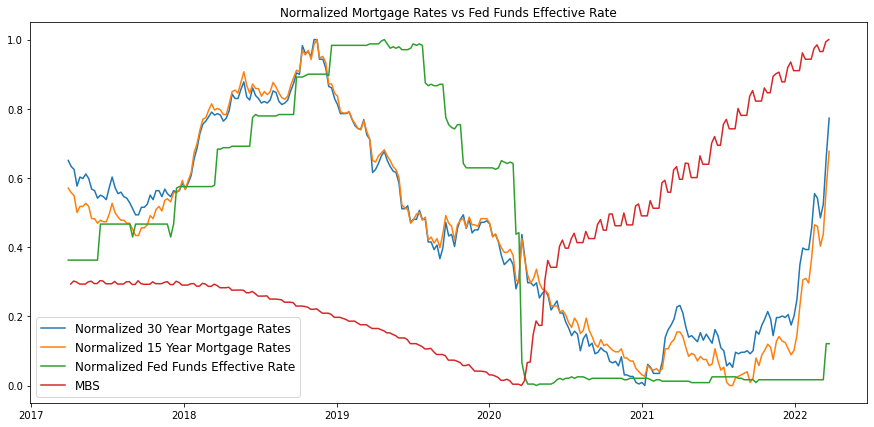

In [92]:
fig, ax = plt.subplots(figsize=(15,7))

plt.plot(df_norm['MORTGAGE30US'], label='Normalized 30 Year Mortgage Rates')
plt.plot(df_norm['MORTGAGE15US'], label='Normalized 15 Year Mortgage Rates')
plt.plot(df_norm['DFF'], label='Normalized Fed Funds Effective Rate')
plt.plot(df_mrs_norm, label='MBS')

legend = ax.legend(loc='lower left', fontsize='large')
plt.title('Normalized Mortgage Rates vs Fed Funds Effective Rate')


<AxesSubplot:xlabel='DATE'>

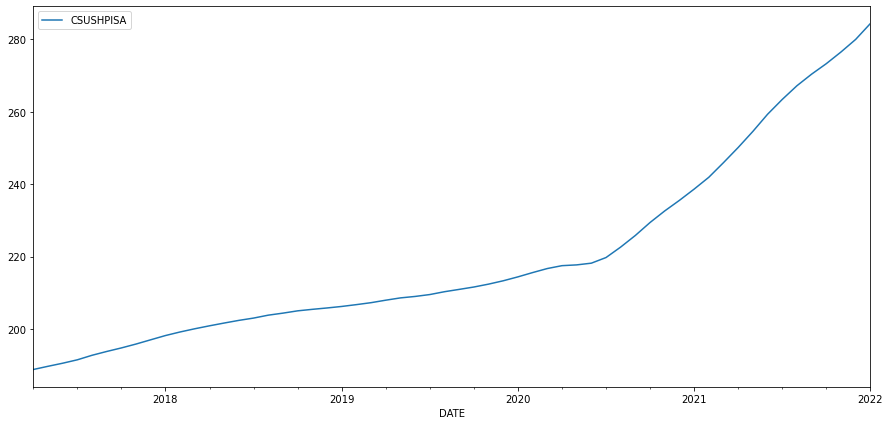

In [93]:
df_sp_hpi = pdr.get_data_fred(['CSUSHPISA'])

df_sp_hpi.plot(figsize=(15,7))

<AxesSubplot:xlabel='DATE'>

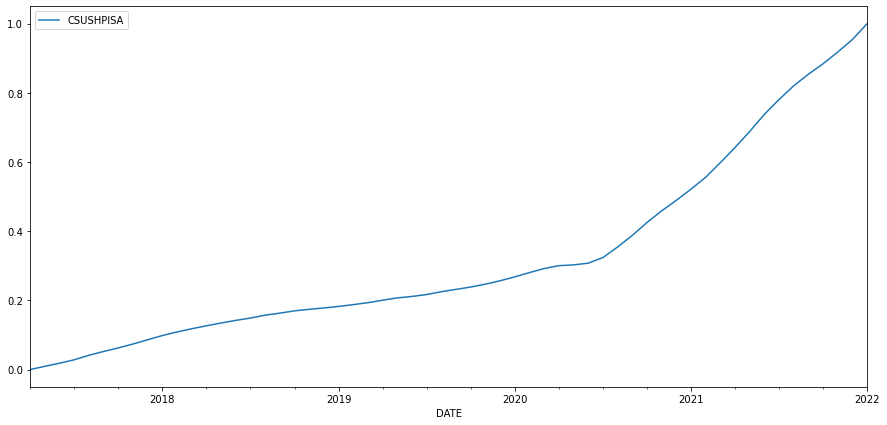

In [94]:
df_sp_hpi = (df_sp_hpi-df_sp_hpi.min())/(df_sp_hpi.max()-df_sp_hpi.min())

df_sp_hpi.plot(figsize=(15,7))

Text(0.5, 1.0, 'Normalized Mortgage Rates vs Fed Funds Effective Rate')

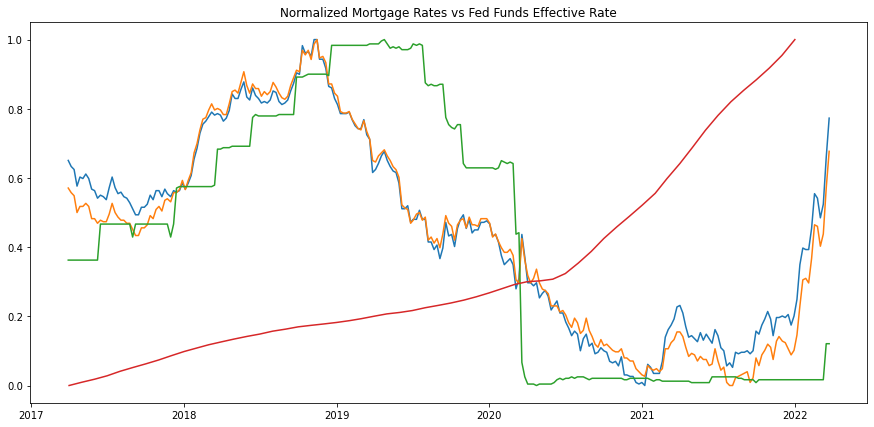

In [95]:
fig, ax = plt.subplots(figsize=(15,7))

plt.plot(df_norm['MORTGAGE30US'], label='Normalized 30 Year Mortgage Rates')
plt.plot(df_norm['MORTGAGE15US'], label='Normalized 15 Year Mortgage Rates')
plt.plot(df_norm['DFF'], label='Normalized Fed Funds Effective Rate')
plt.plot(df_sp_hpi, label='hpi')

#legend = ax.legend(loc='lower left', fontsize='large')
plt.title('Normalized Mortgage Rates vs Fed Funds Effective Rate')


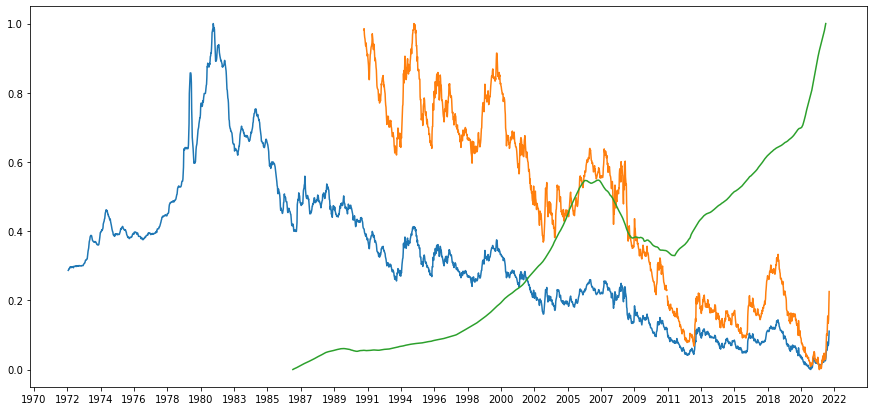

In [99]:
end = dt.now()
start = dt.now()-timedelta(days=(365.2425*50))

df_hpi = pdr.DataReader('CSUSHPISA', 'fred', start, end)

df_mr = pdr.get_data_fred(['MORTGAGE30US','MORTGAGE15US'],start, end)

df_hpi = (df_hpi-df_hpi.min())/(df_hpi.max()-df_hpi.min())
df_mr = (df_mr-df_mr.min())/(df_mr.max()-df_mr.min())


fig, ax = plt.subplots(figsize=(15,7))
ax.xaxis.set_major_locator(MaxNLocator(30)) 

plt.plot(df_mr['MORTGAGE30US'], label='')
plt.plot(df_mr['MORTGAGE15US'], label='')
plt.plot(df_hpi, label='')

